In [1]:
#| echo: false
#| warning: false
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdc = pd.read_csv("../../data/01-modified-data/cdc_clean.csv")
cdc.drop('Unnamed: 0', axis = 1, inplace= True)
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   group                   9977 non-null   object 
 1   state                   9977 non-null   object 
 2   subgroup                9977 non-null   object 
 3   phase                   9977 non-null   float64
 4   time_period             9977 non-null   int64  
 5   time_period_start_date  9977 non-null   object 
 6   time_period_end_date    9977 non-null   object 
 7   value                   9977 non-null   float64
 8   lowci                   9977 non-null   float64
 9   highci                  9977 non-null   float64
 10  key                     9977 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 857.5+ KB


In [3]:
cdc.head()

group          state       subgroup  phase  time_period  \
0  National Estimate  United States  United States    3.5           46   
1                Age  United States  18 - 29 years    3.5           46   
2                Age  United States  30 - 39 years    3.5           46   
3                Age  United States  40 - 49 years    3.5           46   
4                Age  United States  50 - 59 years    3.5           46   

  time_period_start_date time_period_end_date  value  lowci  highci  key  
0             2022-06-01           2022-06-13   14.0   13.5    14.5    1  
1             2022-06-01           2022-06-13   17.8   15.9    19.8    1  
2             2022-06-01           2022-06-13   15.2   14.1    16.2    1  
3             2022-06-01           2022-06-13   16.9   15.7    18.3    1  
4             2022-06-01           2022-06-13   15.3   14.1    16.7    1

Thus far, we can see some of the important columns to take a further look at are `group`, `subgroup`, `value`, and `key`. Firstly, let's look at the distribution of the value (percent having Long Covid based on the key's defintion) grouped by each key. 

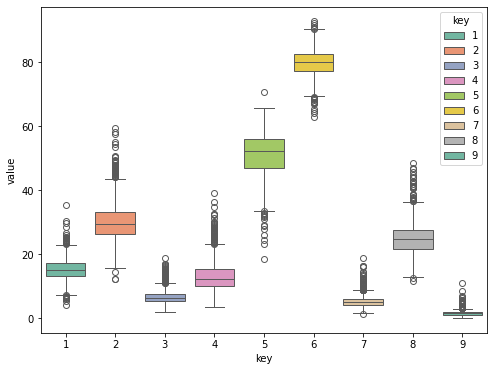

In [4]:
# cdc['key'] = cdc['key'].astype('category')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="key", y="value",
            hue="key", palette="Set2",
            data=cdc)
plt.show()

From the boxplots, we can see that the distibution across keys is varying, with the highest percentage going to key 6, representing the percentage of adults with any activity limitations from long Covid who also currently have long Covid. The lowest range of values goes to key 9, which represents the percentage of adults of significant activity limitations. 

Thus, to understand this data further, we'll take a look at the additional groups affected by Long Covid in a number of ways. 

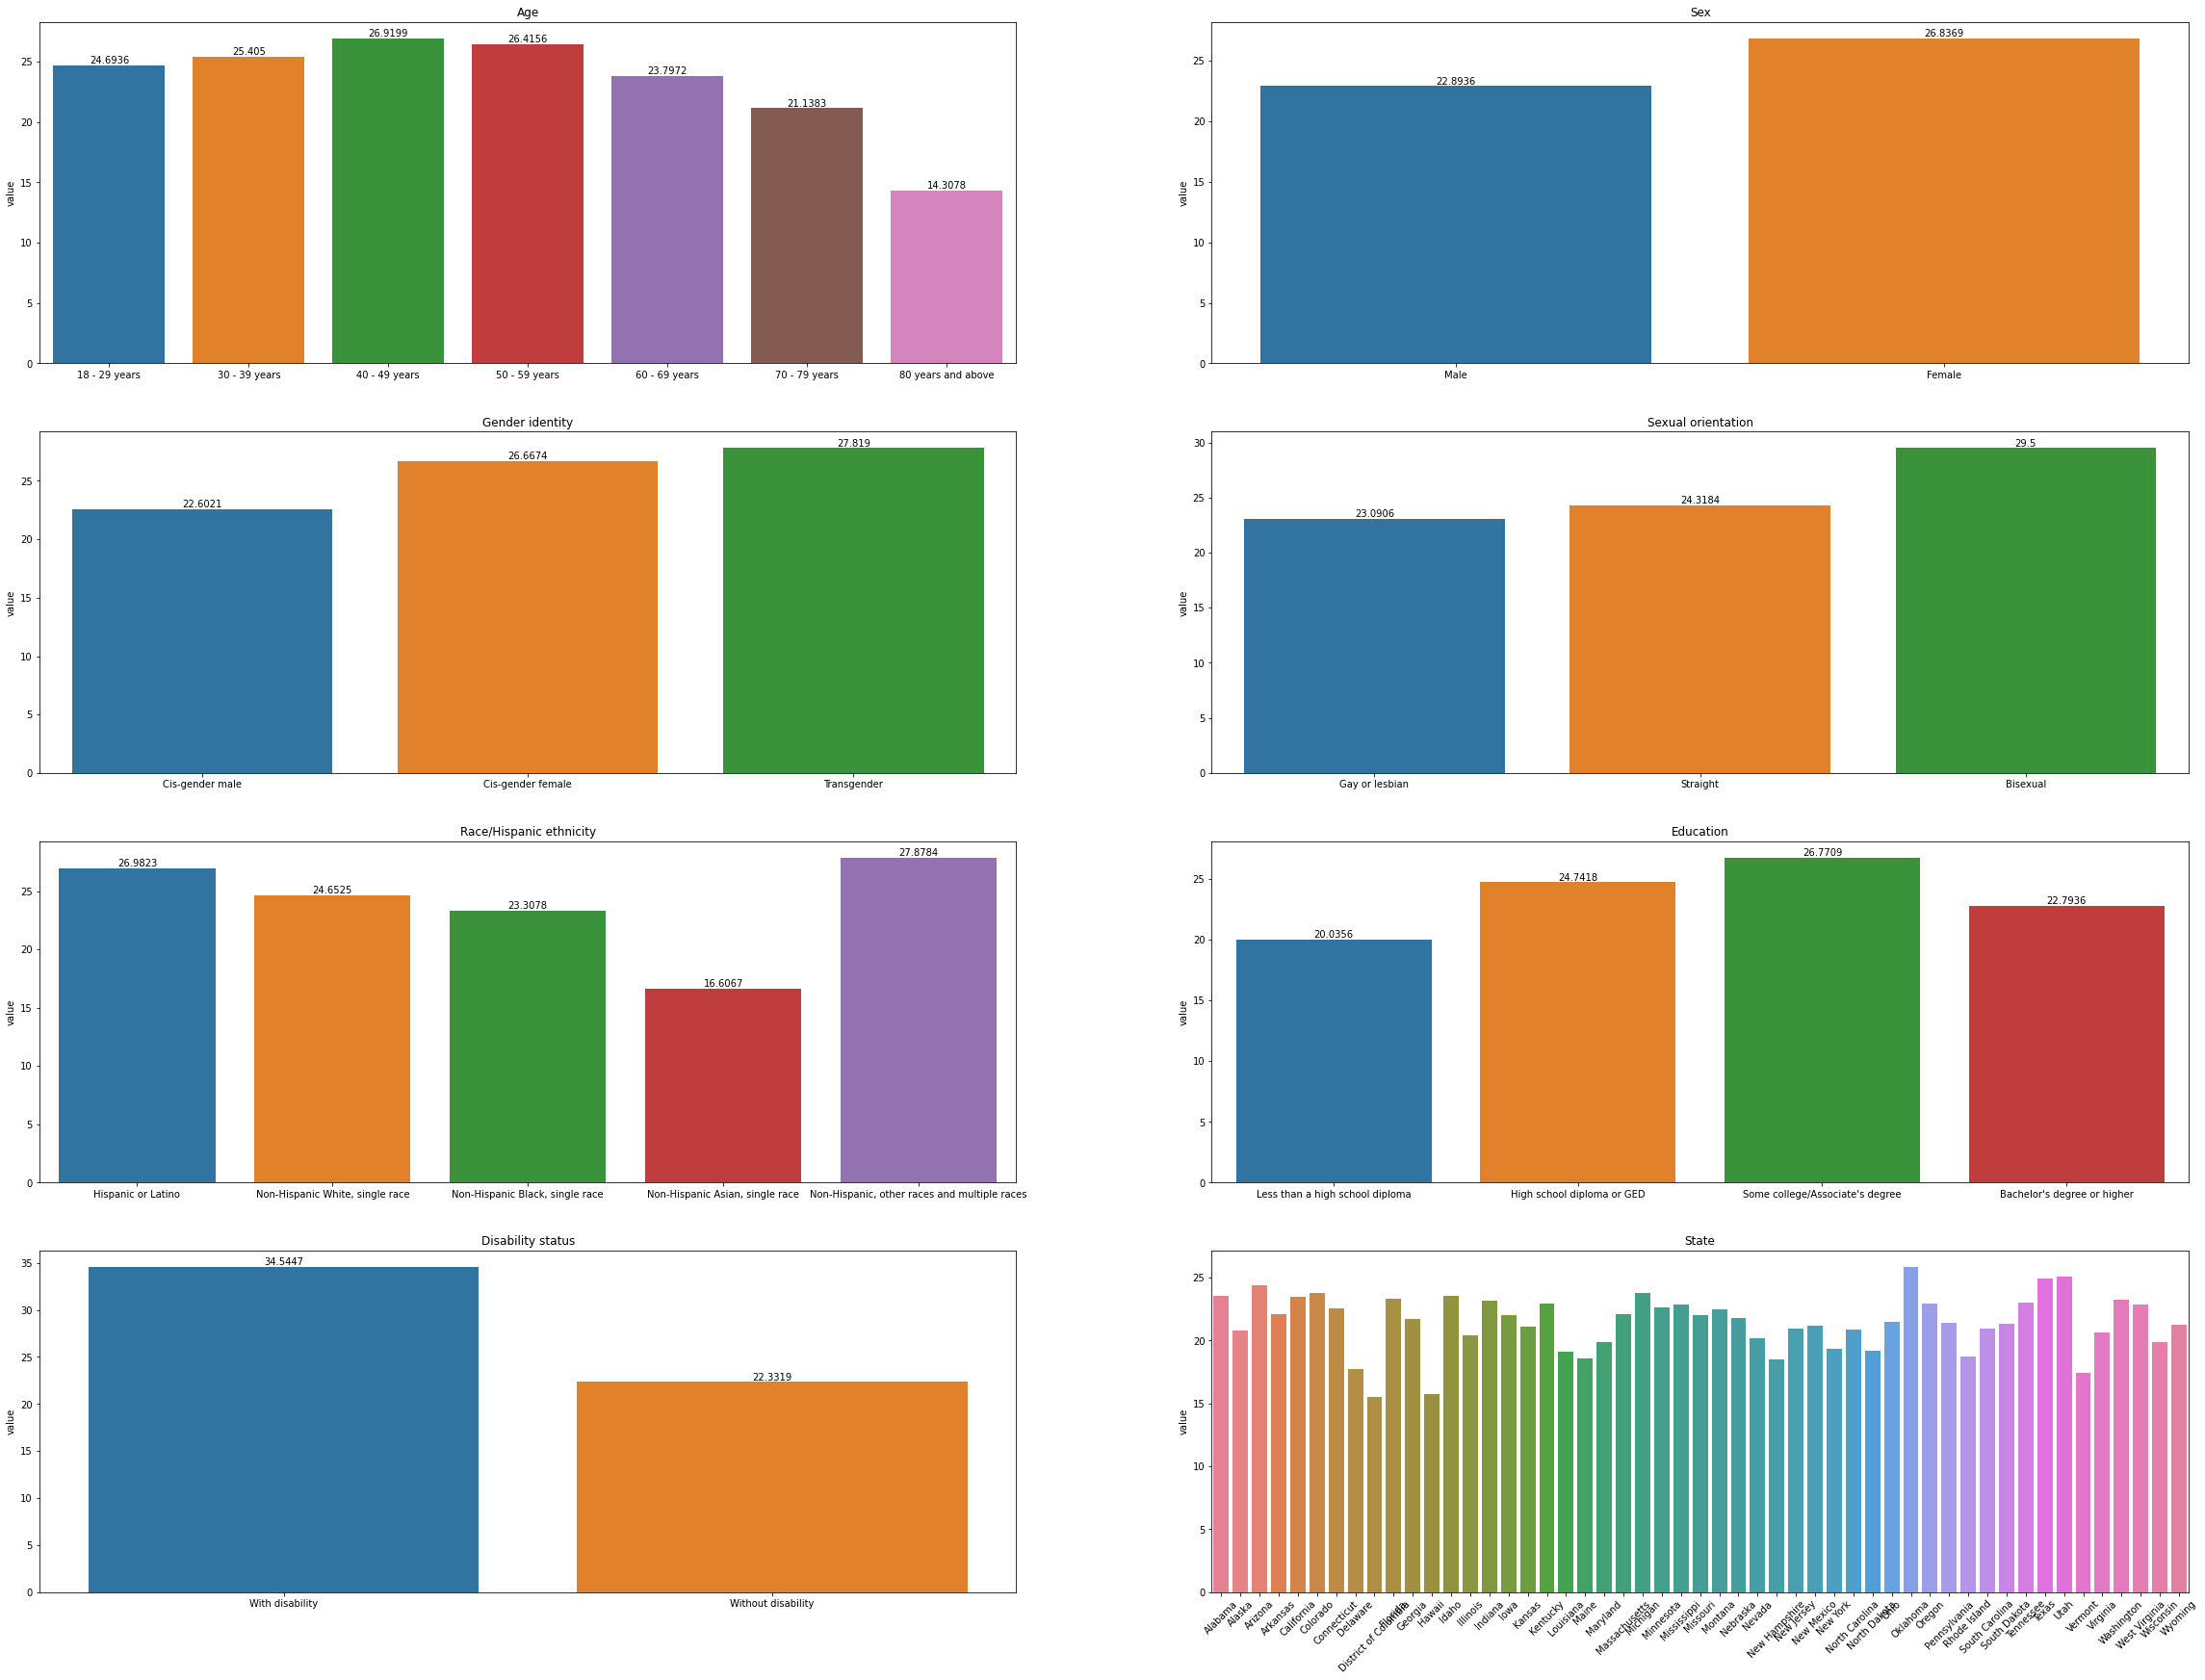

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(40, 30))

groups = cdc['group'].unique()
for i, ax in zip(range(1,9), axs.ravel()):
    if i == 8:
        analysis = cdc[cdc["group"] == groups[i]]
        sns.barplot(analysis, x="subgroup", y="value", hue = "subgroup", ax = ax, errorbar=None)

        # chart formatting
        ax.set_title(groups[i])
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45)
    else:
        analysis = cdc[cdc["group"] == groups[i]]
        sns.barplot(analysis, x="subgroup", y="value", hue = "subgroup", estimator = "mean", ax = ax, errorbar=None)
        for j in ax.containers:
            ax.bar_label(j,)

        # chart formatting
        ax.set_title(groups[i])
        ax.set_xlabel("")

plt.show()

Let's take a look at the data through each group and it's given sugroups. Primarily, ammongst all Long Covid patients surveyed through the CDC, we can see that the largest age group surveyed was those age 40-49. Additionally, more females responded to the survey than males. In terms of gender and sexuality, cis-gender females and transgender people had a higher experience with long Covid than cis-gender males and bisexual individuals had a greater percentage of long covid experiences. A few other things to note, those in the category "non-hsopanic, other races and multiple races" were highest amongst the ethnicity demographics and not suprisingly, the highest disparity amongst the subcategories was between those who were disabled verses not disabled. Those with a disability had a 12.2% increase in long covid experiences than those who do not have a disability. The is very important to understanding Long Covid, as it has been known to effect those with disabilities more than it say with non-immunocompromised people. 

Lastly, we'll take a look at the overall distributions for each key value in order to understand the survey in greater detail. 

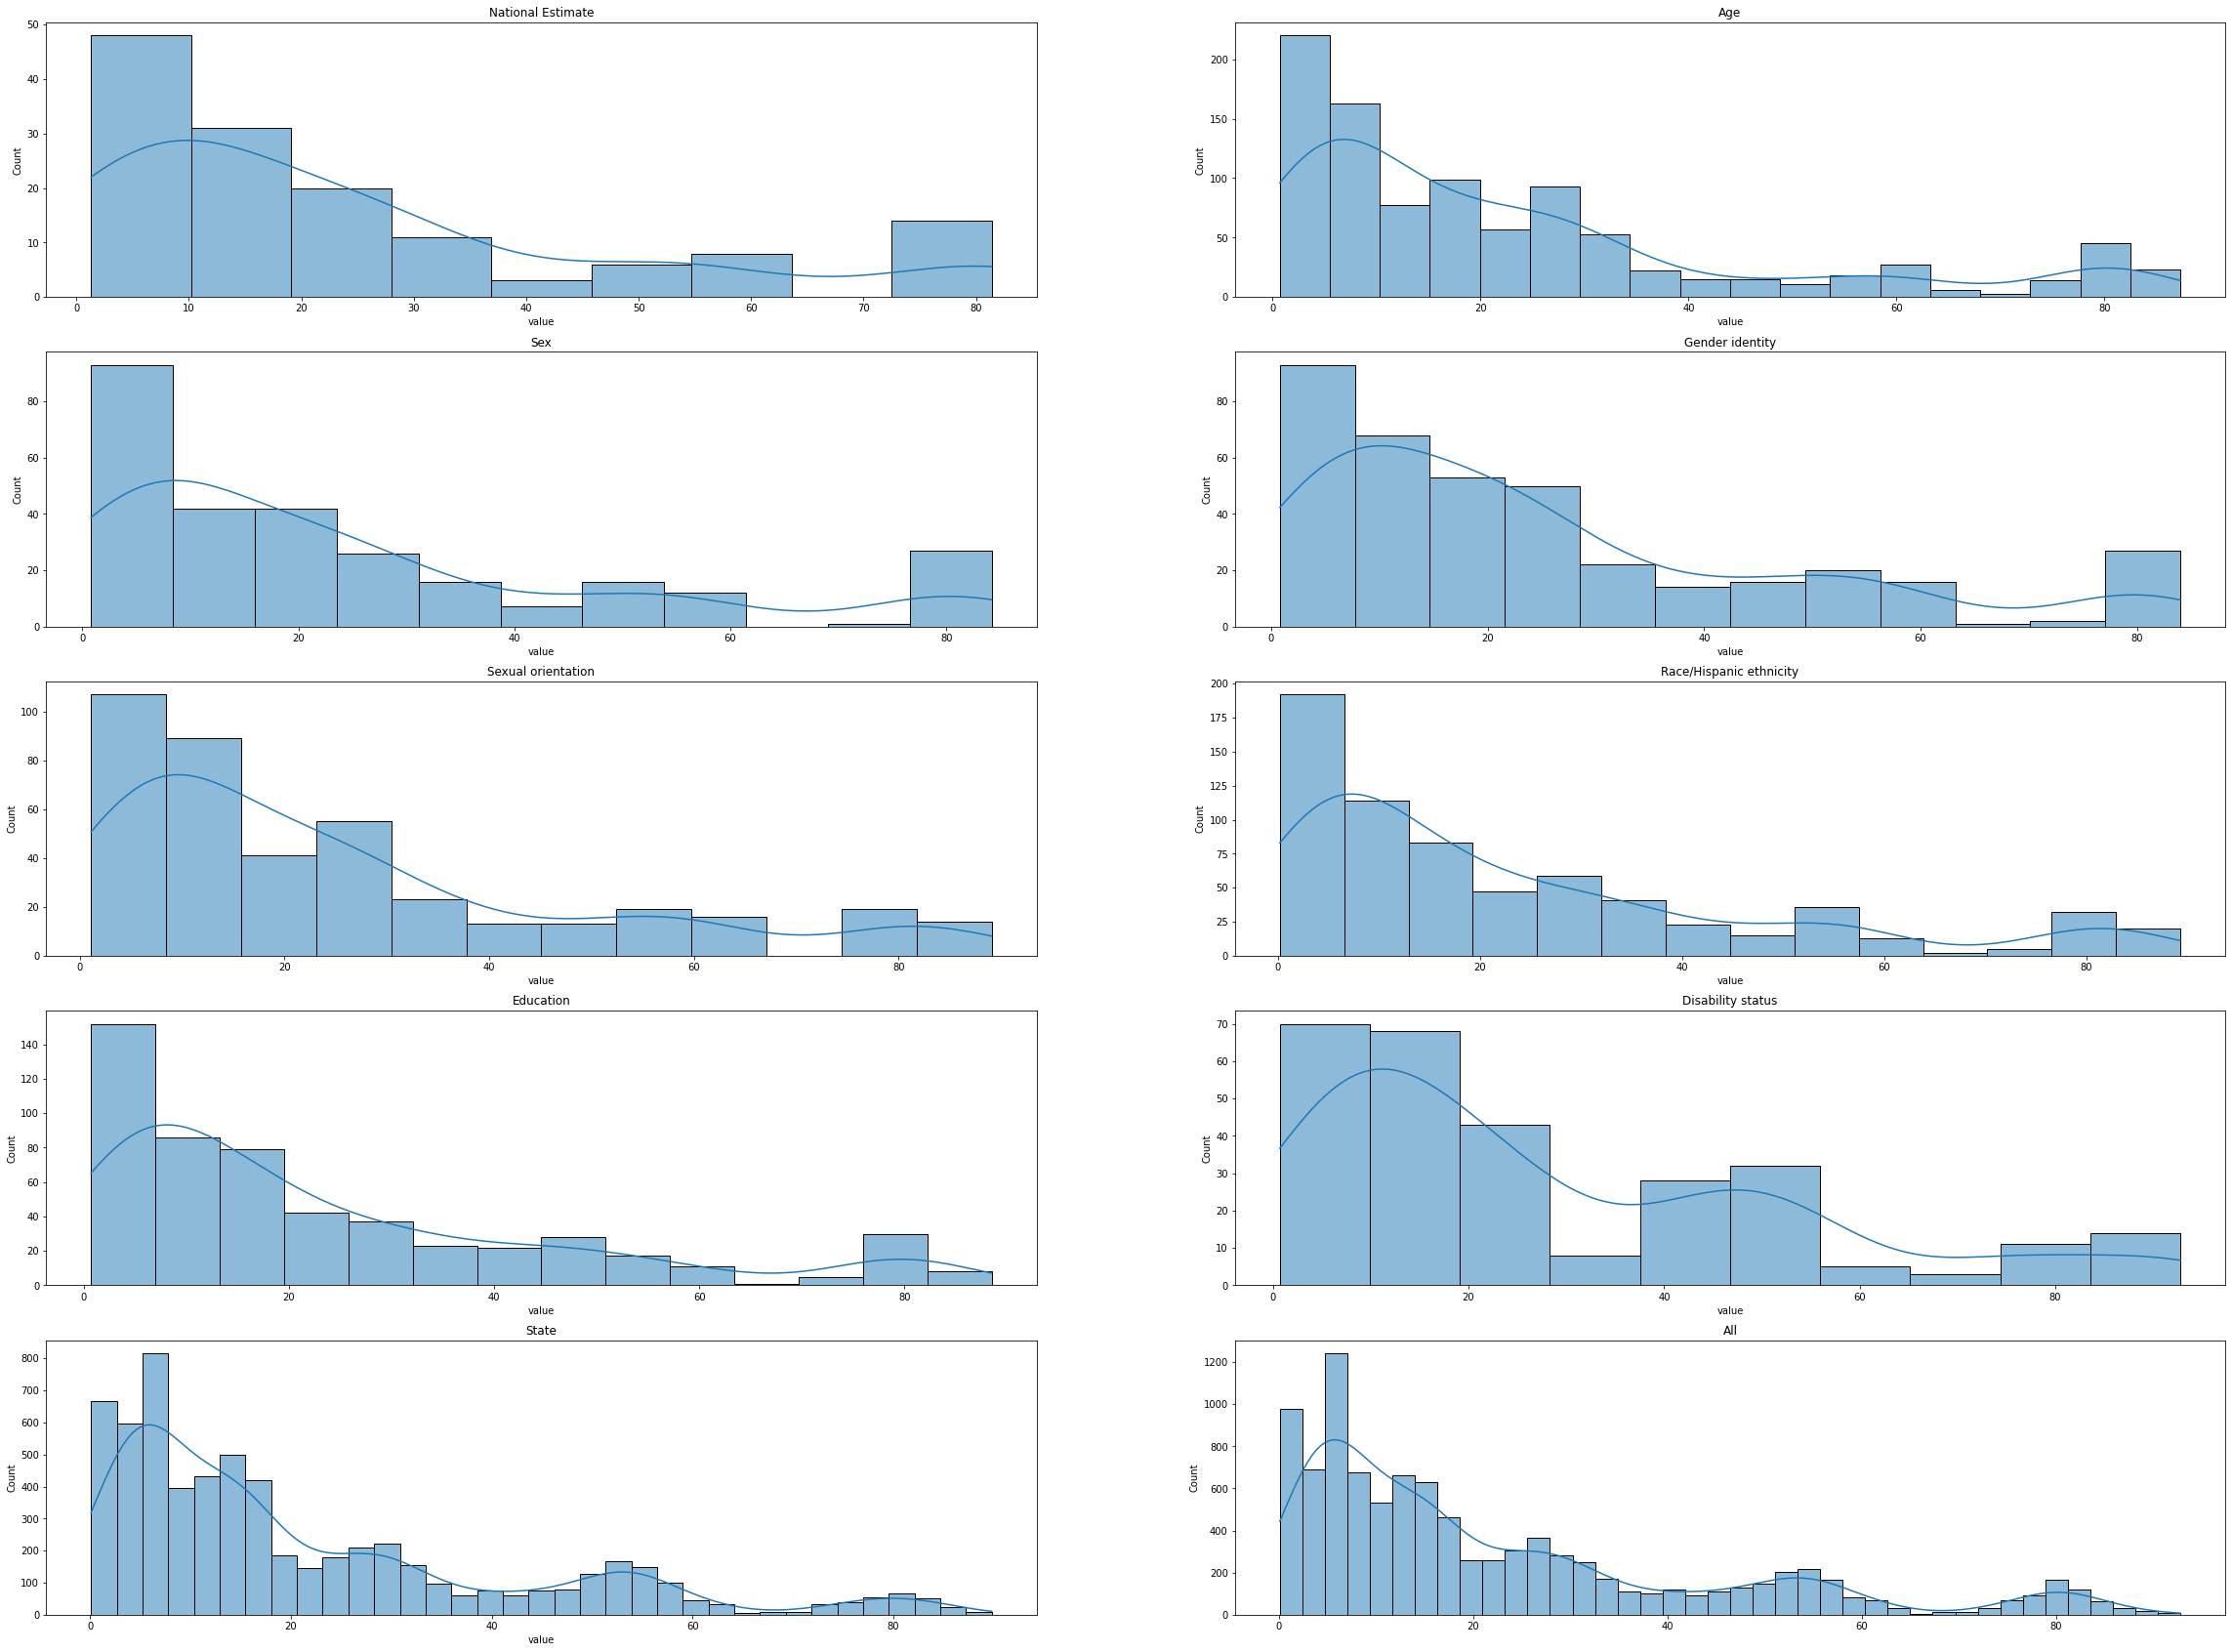

In [6]:
fig, axs = plt.subplots(5, 2, figsize=(40, 30))

groups = cdc['group'].unique()
for i, ax in zip(range(10), axs.ravel()):
    if i == 9:
        sns.histplot(cdc, x="value", ax = ax, kde = True)
        # chart formatting
        ax.set_title('All')
        ax.set_xlabel("")
    else:
        analysis = cdc[cdc["group"] == groups[i]]
        sns.histplot(analysis, x="value", ax = ax, kde = True)

        # chart formatting
        ax.set_title(groups[i])

plt.show()

For all subgroups and the dataset as a whole, we can see that the distributions are all rightly skewed. This indicates that most of the percentages collected all fell closer to zero. Since this dataset is heavily filled with categorical data, we will try to develop a way to pear down the features through naive bayes analysis and feature selection within the next section. 

### Long Covid Symptoms - UK

The following dataset was measured to UK survey and app data regarding symptoms tracked for patients with Long Covid. In order to undertsand the distribution of the data and track the symptoms over time, we can take a look at the following. 

In [64]:
uk_health = pd.read_csv("../../data/01-modified-data/long_covid_uk_health_clean.csv")
uk_health.drop('Unnamed: 0', axis = 1, inplace= True)
uk_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symptom                            272 non-null    object 
 1   domain                             272 non-null    object 
 2   group                              272 non-null    object 
 3   estimate                           264 non-null    float64
 4   lower_95_percent_confidence_limit  264 non-null    float64
 5   upper_95_percent_confidence_limit  264 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.9+ KB


In [65]:
uk_health.head()

symptom                    domain  \
0  Abdominal pain                All people   
1  Abdominal pain  Health/disability status   
2  Abdominal pain  Health/disability status   
3  Abdominal pain  Health/disability status   
4  Abdominal pain  Health/disability status   

                                            group  estimate  \
0                                      All people      9.56   
1                            No health conditions      6.96   
2       Activity not limited by health conditions      6.06   
3  Activity limited a little by health conditions     11.30   
4     Activity limited a lot by health conditions     17.20   

   lower_95_percent_confidence_limit  upper_95_percent_confidence_limit  
0                               8.82                              10.30  
1                               6.04                               7.87  
2                               4.26                               7.85  
3                               9.70                              12.91  
4                              14.83                              19.56

Some important features to look at in the data set are symptom, which are the symptoms people tracked in the survey, domain and group, which act similarly to the group and subgroup from the CDC data, and estimate, which is the corresponding percentage of the those who filled out the survey. If we to extrapolate from the survey data, we could also use the lower and upper confidence boundaries. 

In order to understand the dataset and the symptoms, lets take a look at the symptoms for all people that filled out the survey. 

---

In [60]:
import pandas as pd 
import numpy as np
import wordcloud 
import string 
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

news = pd.read_csv('../../data/00-raw-data/long_covid_news_raw.csv')
text = news['title'].tolist()
text.append(news['content'].tolist())
text = ' '.join([str(elem) for elem in text])

# #FILTER OUT UNWANTED CHARACTERS
new_text=""
for character in text:
    if character in string.printable:
        new_text+=character
text=new_text

# #FILTER OUT UNWANTED WORDS
new_text=""
for word in nltk.tokenize.word_tokenize(text):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";","[ removed ]"]:
            #remove the last space
            new_text=new_text[0:-1]+word+" "
        else: #add a space
            new_text+=word.lower()+" "
text=new_text

with open('../../data/01-modified-data/long_covid_news_clean.txt', 'w') as file:
    # Write the list as a string with elements separated by spaces and add a newline at the end
    file.write(''.join(map(str, text)) + '\n')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shchinthak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[ removed ] [ removed ] `` long colds '' may exist, researchers find studying long covid [ removed ] [ removed ] [ removed ] threads ban sensitive search terms temporary, instagram head says how to cure 'brain fog ' using these super easy expert tips [ removed ] care home boss shocked speed covid variant american long covid sufferers preyed unregulated stem cell clinics a new possible explanation long covid could lead simple treatment patients long covid research is in its most hopeful phase yet have cold cant seem shake? long covid thingand long cold may long-covid may long-term respiratory illness - study it 's long covid: symptoms linger illnesses, leading 'long colds ' long covid: can plant-based, anti-inflammatory diets help? long colds vs. long covid: the differences, similarities symptoms new research offers clues causes long covid fuelling hope eventual treatments [ removed ] brain fog long covid: low serotonin could play role [ removed ] what causes long covid? the answer migh

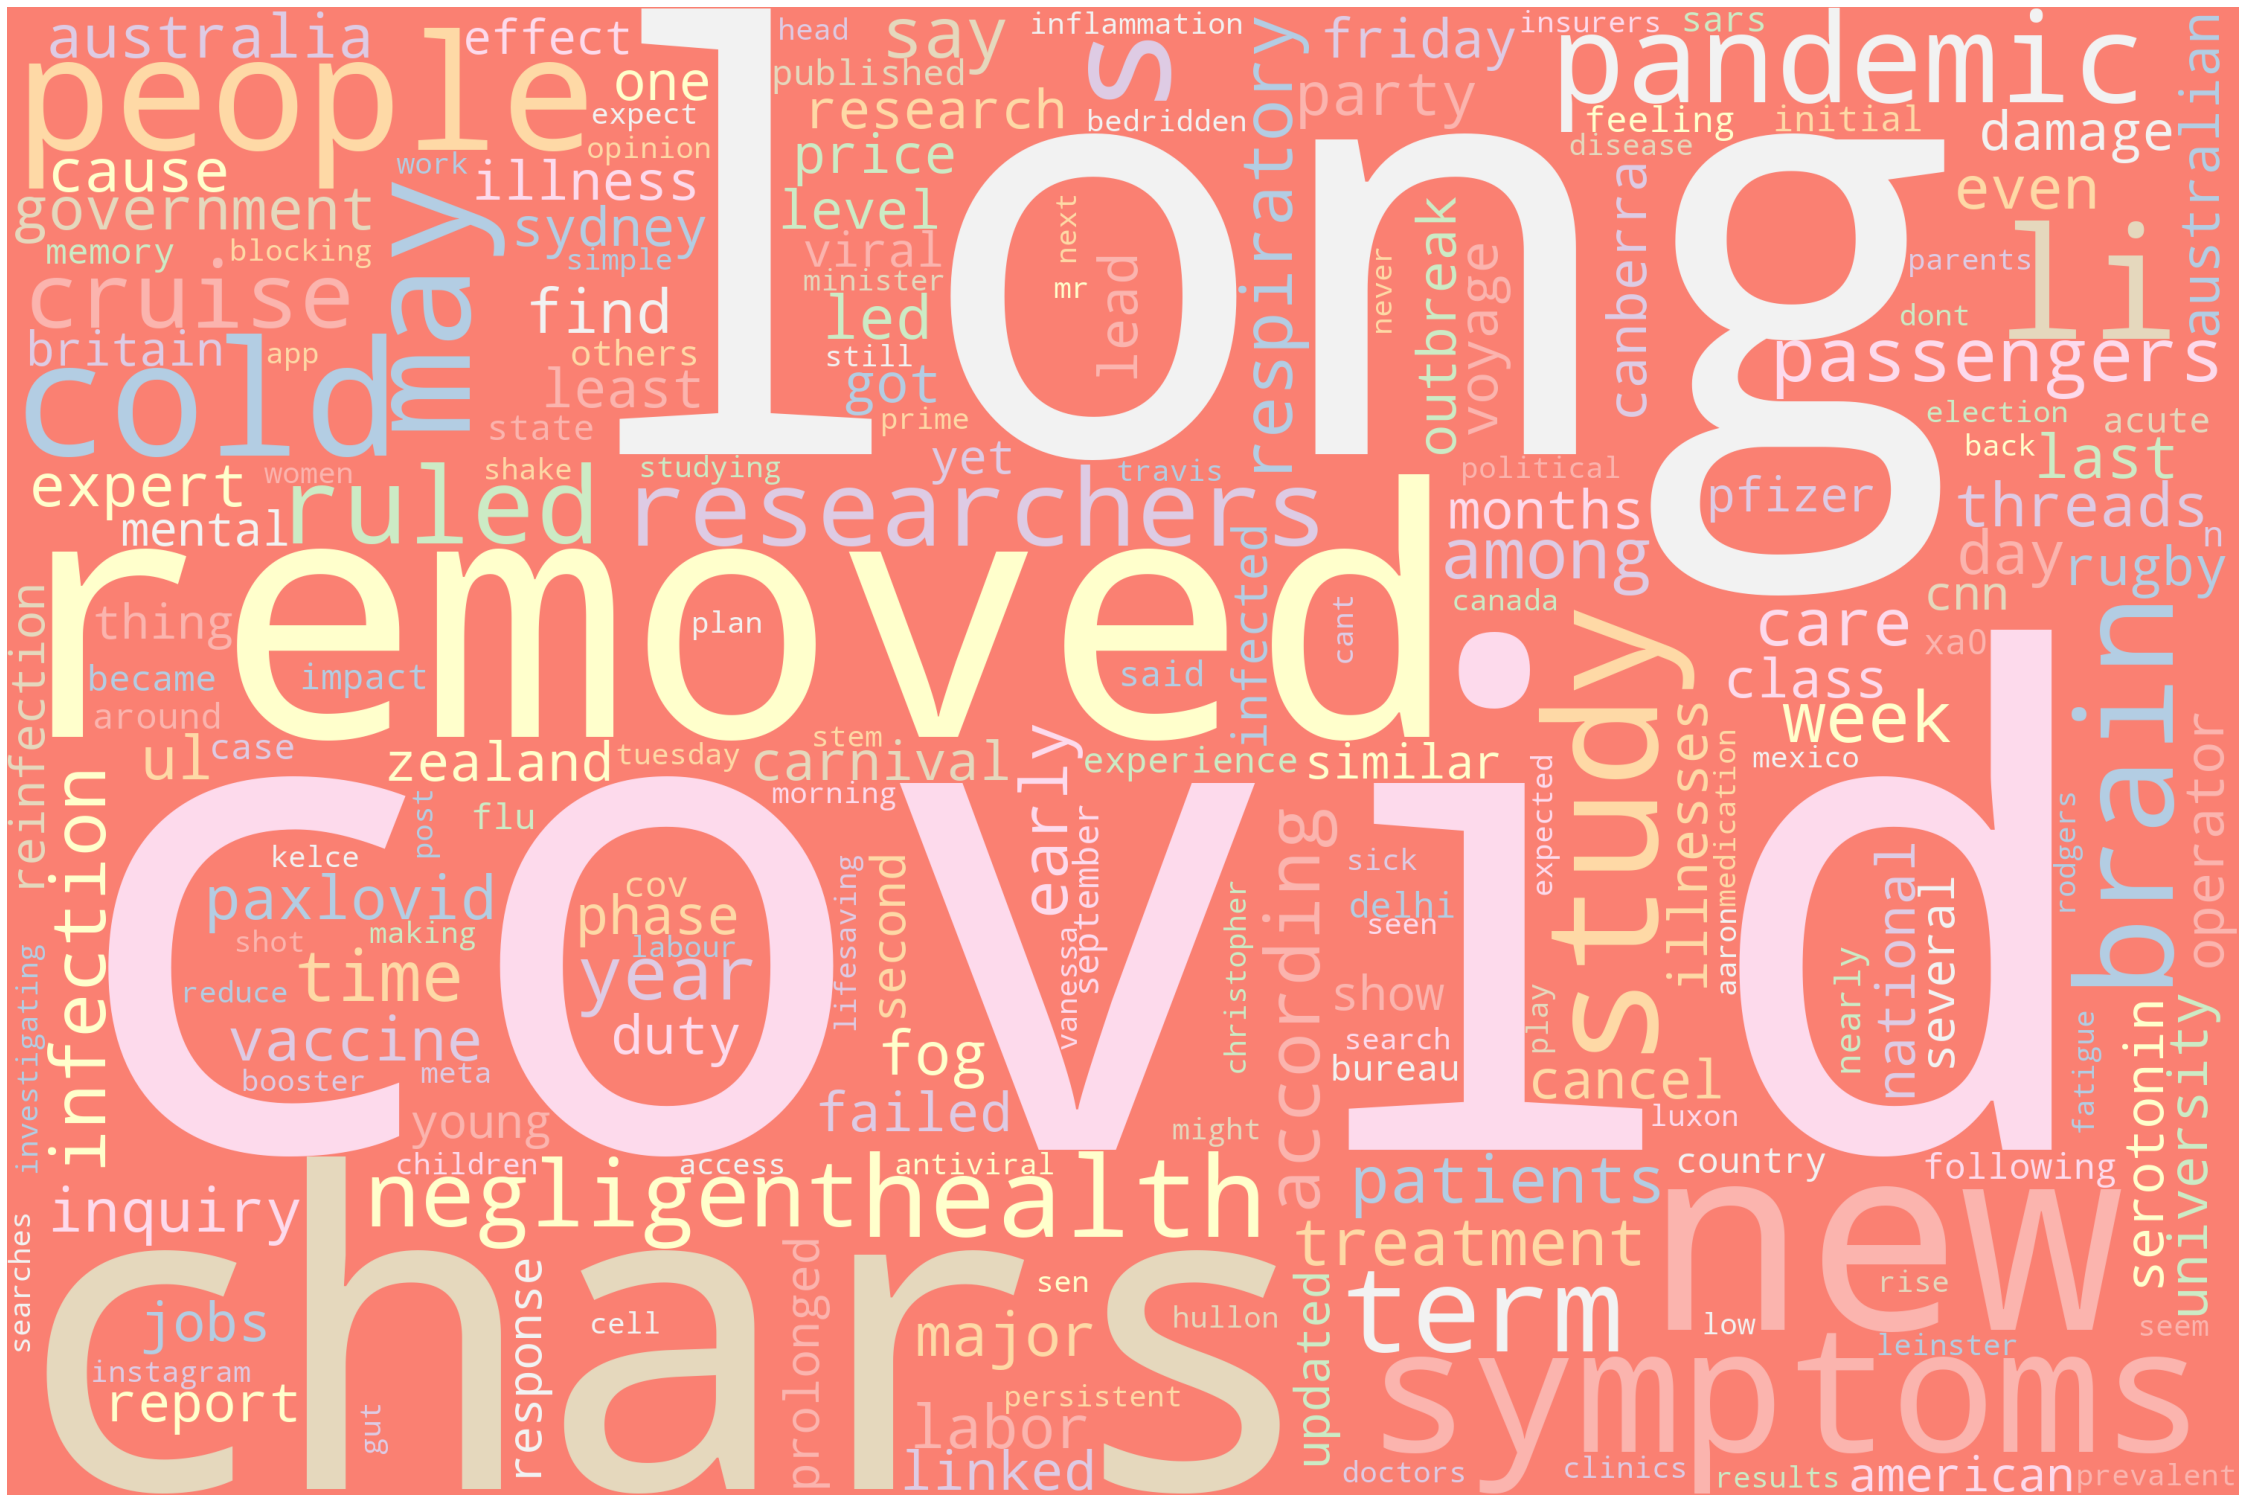

In [61]:
file = open("../../data/01-modified-data/long_covid_news_clean.txt", "r")
content = file.read()
print(content)
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

generate_word_cloud(content)

## Naive Bayes: 

we'll use CDC for record data 

In [67]:
cdc = pd.read_csv("../../data/01-modified-data/cdc_clean.csv")
cdc.drop('Unnamed: 0', axis = 1, inplace= True)
cdc.head()

group          state       subgroup  phase  time_period  \
0  National Estimate  United States  United States    3.5           46   
1                Age  United States  18 - 29 years    3.5           46   
2                Age  United States  30 - 39 years    3.5           46   
3                Age  United States  40 - 49 years    3.5           46   
4                Age  United States  50 - 59 years    3.5           46   

  time_period_start_date time_period_end_date  value  lowci  highci  key  
0             2022-06-01           2022-06-13   14.0   13.5    14.5    1  
1             2022-06-01           2022-06-13   17.8   15.9    19.8    1  
2             2022-06-01           2022-06-13   15.2   14.1    16.2    1  
3             2022-06-01           2022-06-13   16.9   15.7    18.3    1  
4             2022-06-01           2022-06-13   15.3   14.1    16.7    1

In [69]:
#| warnings: false
cdc_naive = cdc[['group', 'subgroup', 'value', 'key']]
cdc_naive['group'] = cdc_naive['group'].astype('category').cat.codes
cdc_naive['subgroup'] = cdc_naive['subgroup'].astype('category').cat.codes


/var/folders/hh/g7z_nzzj3b90yyn96_xmf8d40000gn/T/ipykernel_30922/84606103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdc_naive['group'] = cdc_naive['group'].astype('category').cat.codes
/var/folders/hh/g7z_nzzj3b90yyn96_xmf8d40000gn/T/ipykernel_30922/84606103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdc_naive['subgroup'] = cdc_naive['subgroup'].astype('category').cat.codes


group  subgroup  value  key
0         4        68   14.0    1
1         0         0   17.8    1
2         0         1   15.2    1
3         0         2   16.9    1
4         0         3   15.3    1
...     ...       ...    ...  ...
9972      8        71    1.7    9
9973      8        72    1.6    9
9974      8        73    2.2    9
9975      8        74    0.8    9
9976      8        77    3.0    9

[9977 rows x 4 columns]

In [99]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [100]:
X_train, X_test, y_train, y_test = train_test_split(cdc_naive[['group', 'subgroup', 'value']], cdc_naive['key'], test_size = 0.2, random_state = 50)

In [101]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [102]:
y_predicted = classifier.predict(X_test)
print("The accuray of the multinomial naive bayes model is: ", accuracy_score(y_test, y_predicted))

The accuray of the multinomial naive bayes model is:  0.6918837675350702


Let's take a look at the classification report for out model

In [103]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.57      0.80      0.67       264
           2       0.70      0.77      0.74       289
           3       0.57      0.55      0.56       264
           4       0.60      0.32      0.42       249
           5       0.93      0.94      0.93       264
           6       1.00      0.98      0.99       120
           7       0.57      0.65      0.61       223
           8       0.32      0.18      0.23       122
           9       0.90      0.93      0.91       201

    accuracy                           0.69      1996
   macro avg       0.68      0.68      0.67      1996
weighted avg       0.68      0.69      0.68      1996



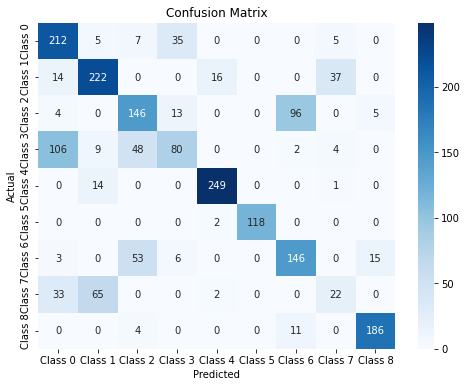

In [104]:
conf_matrix = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

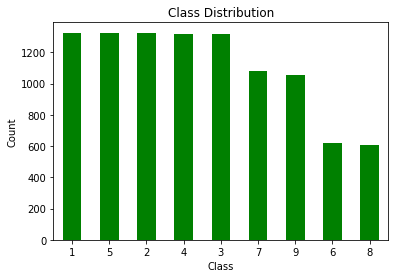

In [105]:
plt.figure(figsize=(6, 4))
cdc_naive['key'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

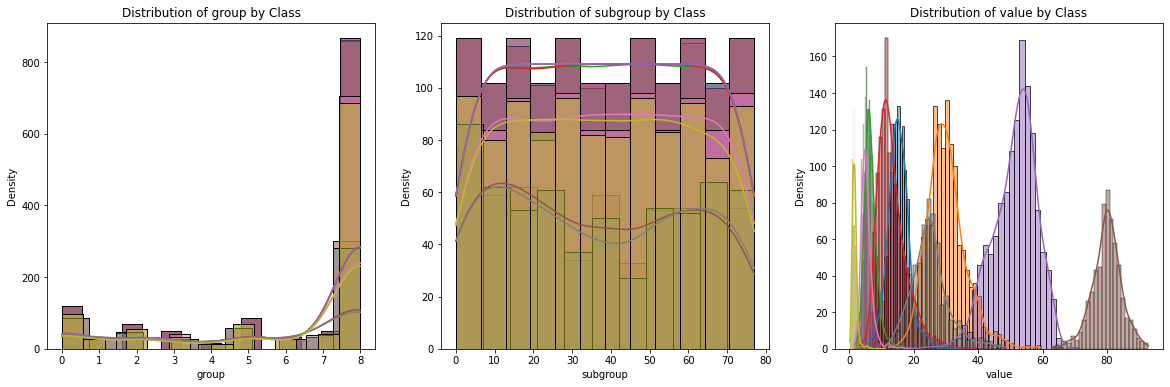

In [106]:
feature_columns = ['group', 'subgroup', 'value']  
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for feature, ax in zip(feature_columns, axs.ravel()):
    for class_label in cdc_naive['key'].unique():  # Replace 'label_column' with your actual label column name
        sns.histplot(cdc_naive[cdc_naive['key'] == class_label][feature], kde=True, label=f'Class {class_label}', ax = ax)
        
    ax.set_title(f'Distribution of {feature} by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.show()

In [147]:
#Let's gather additional data for the textual analysis:

API_KEY = '8491eeb10bba463a9665a53da25b1c69'

from newsapi import NewsApiClient
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

date = date.today()
date_past = date - relativedelta(months=1)

# Init
newsapi = NewsApiClient(api_key= API_KEY)

sources = newsapi.get_sources()
sources = pd.DataFrame(sources['sources'])
sources = sources[(sources['language'] == 'en')]

df_sources = ', '.join(sources['id'].astype(str))
df_domains = ', '.join(sources['url'].astype(str))


# /v2/everything
p1 = newsapi.get_everything(q='"long covid"',
sources=str(df_sources),
domains=str(df_domains),
from_param= date_past,
to= date,
language= 'en',
sort_by='relevancy')

p2 = newsapi.get_everything(q='coronavirus',
sources=str(df_sources),
domains=str(df_domains),
from_param= date_past,
to= date,
language= 'en',
sort_by='relevancy')

p3 = newsapi.get_everything(q='influenza',
sources=str(df_sources),
domains=str(df_domains),
from_param= date_past,
to= date,
language= 'en',
sort_by='relevancy')

#Concating the data

long_covid_news = pd.DataFrame(p1['articles'])
long_covid_news['topic'] = 1
covid_news = pd.DataFrame(p2['articles'])
covid_news['topic'] = 2
influenza_news = pd.DataFrame(p3['articles'])
influenza_news['topic'] = 3
all_news = pd.concat([long_covid_news, covid_news, influenza_news], axis=0)

all_news[['id', 'name']] = pd.DataFrame(all_news['source'].tolist())
all_news.drop(columns=['source'], inplace=True)
all_news = all_news[['id','name','author','title','description','url','publishedAt','content','topic']]
all_news = all_news[all_news['content'] != '[Removed]']
all_news.head()

id       name                            author  \
2    cbs-news   CBS News                    Sara Moniuszko   
6    cbs-news   CBS News                    Caitlin O'Kane   
7   usa-today  USA Today                    Josie Goodrich   
9    bbc-news   BBC News  https://www.facebook.com/bbcnews   
10   newsweek   Newsweek                      Jess Thomson   

                                                title  \
2   "Long colds" may exist, researchers find while...   
6   Threads ban on sensitive search terms is tempo...   
7   How To Cure 'Brain Fog' Using These Super Easy...   
9    Care home boss shocked at speed of Covid variant   
10  American Long Covid Sufferers Preyed on by Unr...   

                                          description  \
2   Researchers found that people with acute respi...   
6   The list of banned search terms on Threads inc...   
7   Brain fog is a symptom characterized by feelin...   
9   Kay Emsley says she was taken by surprised at ...   
10  Sixty clinics served by 38 businesses are sell...   

                                                  url           publishedAt  \
2   https://www.cbsnews.com/news/long-colds-may-ex...  2023-10-06T17:27:07Z   
6   https://www.cbsnews.com/news/threads-ban-searc...  2023-10-18T19:54:56Z   
7   https://www.usatoday.com/story/life/health-wel...  2023-10-06T16:40:31Z   
9    https://www.bbc.co.uk/news/articles/cqv9j1q7ve7o  2023-10-16T05:01:02Z   
10  https://www.newsweek.com/long-covid-stem-cell-...  2023-10-26T15:00:01Z   

                                              content  topic  
2   Some people may experience "long colds," or lo...      1  
6   The head of Instagram on Tuesday said the app ...      1  
7   Most people have experienced jet lag that slug...      1  
9   Ms Emsley, 31, said it started with residents ...      1  
10  Dozens of health clinics across the country ar...      1

In [148]:
import string
import nltk

def clean_text(text):
    # FILTER OUT UNWANTED CHARACTERS
    new_text = ""
    for character in text:
        if character in string.printable:
            new_text += character
    
    # FILTER OUT UNWANTED WORDS
    new_text = ""
    for word in nltk.tokenize.word_tokenize(text):
        if word not in nltk.corpus.stopwords.words('english'):
            if word in [".", ",", "!", "?", ":", ";",'li','ul']:
                # remove the last space
                new_text = new_text[0:-1] + word + " "
            else:  # add a space
                new_text += word.lower() + " "
    
    return new_text.strip()  # Remove leading/trailing spaces

all_news['title'] = all_news['title'].apply(clean_text)
all_news['description'] = all_news['description'].apply(clean_text)
all_news['content'] = all_news['content'].apply(clean_text)


In [149]:
all_news['combined_text'] = all_news.apply(lambda row: ' '.join([str(row['title']), str(row['description']), str(row['content'])]), axis=1)
all_news.tail()

id      name                            author  \
95  abc-news  ABC News                              None   
96  abc-news  ABC News                              None   
97  abc-news  ABC News                              None   
98  abc-news  ABC News                      Daryl Austin   
99  abc-news  ABC News  https://www.facebook.com/bbcnews   

                                                title  \
95  new covid-19 vaccines available oct. 16 n.b., ...   
96  covid-19 kills 4 new brunswick, virus activity...   
97  vaccine fatigue real, says pharmacist, covid-1...   
98  why new covid shot game-changer ( term ‘ boost...   
99  south africa egg shortage: how poultry product...   

                                          description  \
95  new brunswickers book covid-19 vaccine appoint...   
96  covid-19 killed least four new brunswickers, h...   
97  the fall season usually means new season respi...   
98  the latest vaccine formula available local pha...   
99  millions chickens killed amid one worst bird f...   

                                                  url           publishedAt  \
95  https://www.cbc.ca/news/canada/new-brunswick/c...  2023-10-05T14:23:08Z   
96  https://www.cbc.ca/news/canada/new-brunswick/c...  2023-10-31T16:15:48Z   
97  https://www.cbc.ca/news/canada/newfoundland-la...  2023-10-20T20:23:45Z   
98  https://www.nationalgeographic.com/science/art...  2023-10-03T00:00:00Z   
99   https://www.bbc.co.uk/news/world-africa-67054197  2023-10-11T01:37:10Z   

                                              content  topic  \
95  new brunswickers start booking appointments fr...      3   
96  covid-19 killed least four new brunswickers, h...      3   
97  the fall season usually means new season respi...      3   
98  unlike earlier pandemic, initial vaccines foll...      3   
99  eggs currently south africa 's hottest commodi...      3   

                                        combined_text  
95  new covid-19 vaccines available oct. 16 n.b., ...  
96  covid-19 kills 4 new brunswick, virus activity...  
97  vaccine fatigue real, says pharmacist, covid-1...  
98  why new covid shot game-changer ( term ‘ boost...  
99  south africa egg shortage: how poultry product...

In [150]:
news = all_news['combined_text'].tolist()
y = all_news['topic'].tolist()
y=np.array(y)

# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

from sklearn.feature_extraction.text import CountVectorizer

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(news,MAX_FEATURES=10000)

vocab1 = dict([(value, key) for key, value in vocab0.items()])

df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]

i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

df2.columns = range(df2.columns.size)
x=df2.to_numpy()

#Split to train and test data

import random
N=x.shape[0]
l = [*range(N)]     # indices
cut = int(0.8 * N) #80% of the list
random.shuffle(l)   # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] # last 20% of shuffled list

In [151]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(X,Y,i_print=False):

    if(i_print):
        print(X.shape,Y.shape)

    #SPLIT
    x_train=X[train_index]
    y_train=Y[train_index].flatten()

    x_test=X[test_index]
    y_test=Y[test_index].flatten()

    # INITIALIZE MODEL 
    model = MultinomialNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval, y_test, yp_test)


#TEST
acc_train,acc_test,time_train,time_eval,y_test, y_pred =train_MNB_model(x,y,i_print=False)
print("Testing Accuracy: ", acc_test)
print("Testing Time: ", time_eval)

Testing Accuracy:  76.08695652173914
Testing Time:  0.00323099999999954


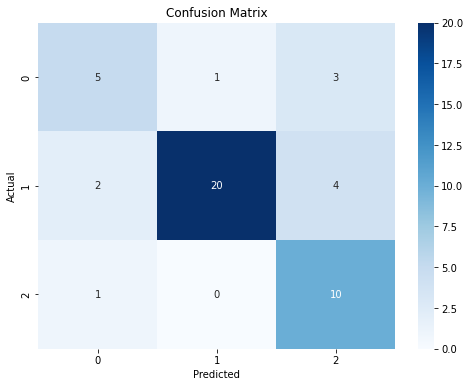

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5 50 50 79.34782608695652 67.3913043478261
10 100 100 79.8913043478261 67.3913043478261
15 150 150 83.15217391304348 67.3913043478261
20 200 200 85.86956521739131 67.3913043478261
25 250 250 86.95652173913044 67.3913043478261
30 300 300 88.58695652173914 67.3913043478261
35 350 350 88.58695652173914 73.91304347826086
40 400 400 90.76086956521739 71.73913043478261
45 450 450 91.30434782608695 73.91304347826086
50 500 500 91.30434782608695 76.08695652173914
5 2750 2750 96.73913043478261 76.08695652173914
10 5000 2893 96.73913043478261 76.08695652173914


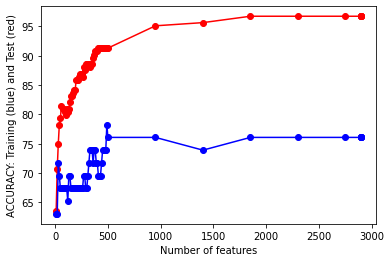

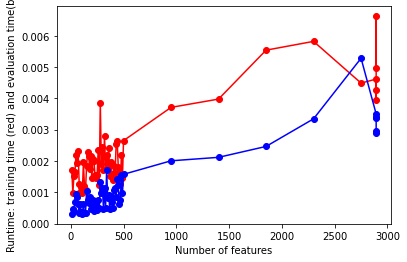

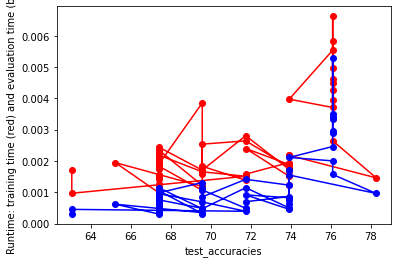

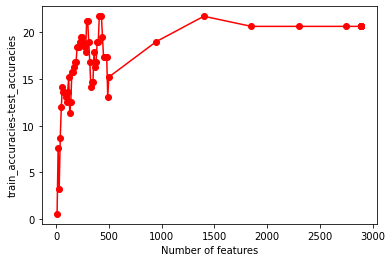

In [153]:
##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval,y_test,y_pred)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=50, min_index=0, max_index=500)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=10, min_index=500, max_index=5000)

#PLOT-1
plt.plot(num_features,train_accuracies,'-or')
plt.plot(num_features,test_accuracies,'-ob')
plt.xlabel('Number of features')
plt.ylabel('ACCURACY: Training (blue) and Test (red)')
plt.show()

# #PLOT-2
plt.plot(num_features,train_time,'-or')
plt.plot(num_features,eval_time,'-ob')
plt.xlabel('Number of features')
plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
plt.show()

# #PLOT-3
plt.plot(np.array(test_accuracies),train_time,'-or')
plt.plot(np.array(test_accuracies),eval_time,'-ob')
plt.xlabel('test_accuracies')
plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
plt.show()

# #PLOT-3
plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
plt.xlabel('Number of features')
plt.ylabel('train_accuracies-test_accuracies')
plt.show()